In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import sklearn.preprocessing
from sklearn.metrics import roc_auc_score

In [85]:
df = pd.read_csv('../heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [86]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [87]:
df.isnull().any(axis = 1).sum()

0

Text(0.5, 0, 'creatinine_phosphokinase')

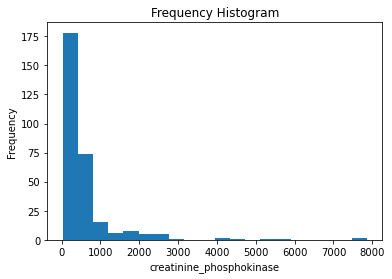

In [123]:
%matplotlib inline
plt.hist(df['creatinine_phosphokinase'], bins=20)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');
plt.xlabel('creatinine_phosphokinase')

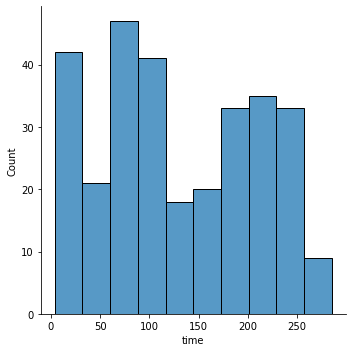

In [89]:
import seaborn as sns
sns.displot(df['time'])

In [90]:
from sklearn.model_selection import train_test_split as spliter

df['critical_pos'] = (((df['smoking'] == 1) | (df['diabetes'] == 1 ) | (df['anaemia'] == 1) | (df['high_blood_pressure'] == 1)) & 
   (df['DEATH_EVENT'] == 1))
df['critical_pos'].replace({True:1, False:0}, inplace=True)

df = df.reindex(np.random.RandomState(seed = 42).permutation(df.index))
x_train, x_test, y_train, y_test = spliter(df.drop(columns = 'DEATH_EVENT'), df['DEATH_EVENT'], test_size = 0.3,
                                           random_state = 42)
def drop_bool(df):
    ds = []
    ds = pd.DataFrame(ds)
    for i in df.columns:
        if(len(df[i].unique()) != 2):
            ds[i] = df[i]
    return ds
trp = drop_bool(x_train)
tsp = drop_bool(x_test)

scaler = sklearn.preprocessing.StandardScaler()

trp

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
110,85.0,129,60,306000.0,1.2,132,90
237,70.0,232,30,173000.0,1.2,132,210
23,53.0,63,60,368000.0,0.8,135,22
194,45.0,582,20,126000.0,1.6,135,180
147,64.0,1610,60,242000.0,1.0,137,113
...,...,...,...,...,...,...,...
61,50.0,318,40,216000.0,2.3,131,60
228,65.0,56,25,237000.0,5.0,130,207
18,70.0,125,25,237000.0,1.0,140,15
50,68.0,577,25,166000.0,1.0,138,43


In [91]:
co = trp.columns
trp = scaler.fit_transform(trp)
tsp = scaler.transform(tsp)
trp = pd.DataFrame(trp)
tsp = pd.DataFrame(tsp)
trp

,0,1,2,3,4,5,6
0,2.060253,-0.467436,1.939852,0.575630,-0.209767,-1.025249,-0.469653
1,0.788233,-0.359546,-0.769632,-1.015036,-0.209767,-1.025249,1.077962
2,-0.653390,-0.536570,1.939852,1.317143,-0.554634,-0.383701,-1.346635
3,-1.331801,0.007072,-1.672793,-1.577151,0.135101,-0.383701,0.691058
4,0.279425,1.083879,1.939852,-0.189803,-0.382200,0.043998,-0.173027
...,...,...,...,...,...,...,...
204,-0.907794,-0.269463,0.133530,-0.500761,0.738618,-1.239098,-0.856557
205,0.364226,-0.543902,-1.221212,-0.249603,3.066473,-1.452947,1.039272
206,0.788233,-0.471626,-1.221212,-0.249603,-0.382200,0.685546,-1.436913
207,0.618630,0.001834,-1.221212,-1.098755,-0.382200,0.257847,-1.075802


In [92]:
def reset_data(de, tp):
    de.reset_index(inplace = True)
    for i, c in enumerate(co):
        tp.rename(columns = {i: c}, inplace = True)
        de[c] = tp[c]
    de.drop(columns ='index', inplace = True)
reset_data(x_train, trp)
reset_data(x_test, tsp)
x_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,critical_pos
0,2.060253,0,-0.467436,0,1.939852,0,0.575630,-0.209767,-1.025249,1,1,-0.469653,1
1,0.788233,0,-0.359546,0,-0.769632,0,-1.015036,-0.209767,-1.025249,1,0,1.077962,0
2,-0.653390,0,-0.536570,1,1.939852,0,1.317143,-0.554634,-0.383701,1,0,-1.346635,0
3,-1.331801,0,0.007072,0,-1.672793,1,-1.577151,0.135101,-0.383701,1,0,0.691058,1
4,0.279425,0,1.083879,0,1.939852,0,-0.189803,-0.382200,0.043998,1,0,-0.173027,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,-0.907794,0,-0.269463,0,0.133530,1,-0.500761,0.738618,-1.239098,0,0,-0.856557,1
205,0.364226,0,-0.543902,0,-1.221212,0,-0.249603,3.066473,-1.452947,0,0,1.039272,0
206,0.788233,1,-0.471626,0,-1.221212,1,-0.249603,-0.382200,0.685546,0,0,-1.436913,1
207,0.618630,1,0.001834,0,-1.221212,1,-1.098755,-0.382200,0.257847,1,0,-1.075802,1


In [93]:
x_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,critical_pos
0,0.449028,1,-0.527142,0,0.133530,1,-0.189803,-0.209767,-0.597550,1,0,-0.069852,0
1,0.194624,1,-0.494670,1,-0.318051,0,-0.943276,-0.468417,-0.169852,1,1,1.851770,0
2,0.957836,0,-0.381543,0,-1.221212,0,0.192913,-0.209767,-0.597550,0,0,1.039272,0
3,-0.907794,1,-0.482101,0,-1.672793,0,-0.823678,-0.554634,0.471696,1,0,0.252567,0
4,-1.586205,1,-0.340691,1,-2.124374,0,-0.536640,-0.123550,-0.169852,0,0,-0.792073,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2.060253,1,-0.495718,0,1.939852,0,2.979568,1.514570,0.257847,0,0,-0.418066,0
86,0.364226,0,1.165583,0,-0.047103,0,0.065636,-0.295984,0.257847,1,1,1.593834,0
87,-1.331801,0,7.465118,1,-1.221212,1,1.580260,-0.382200,0.471696,1,0,-0.856557,1
88,0.788233,1,-0.540759,0,1.939852,0,-0.034325,-0.295984,-0.169852,0,0,-0.534137,0


In [121]:
model = RandomForestClassifier(n_estimators = 50, random_state = 42)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [122]:
model.score(x_test, y_test)

0.9666666666666667

In [96]:
df.describe()[co]

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [97]:
x_train.describe()[co]

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02
mean,6.188564e-16,-2.257631e-17,-5.205830e-17,-7.011935e-17,1.365202e-16,1.252587e-15,3.399726e-17
std,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00
min,-1.755807e+00,-5.784687e-01,-1.943741e+00,-2.783904e+00,-8.132846e-01,-5.088385e+00,-1.578777e+00
25%,-8.229926e-01,-4.747683e-01,-7.696317e-01,-5.007605e-01,-4.684173e-01,-5.975501e-01,-7.533825e-01
50%,-5.978048e-02,-3.427860e-01,-4.710267e-02,4.939443e-02,-2.959836e-01,4.399770e-02,-1.988204e-01
75%,7.034316e-01,7.071732e-03,5.851103e-01,5.277900e-01,-3.733312e-02,6.855455e-01,8.974070e-01
max,2.908266e+00,7.631667e+00,2.843014e+00,3.410124e+00,6.860013e+00,2.396340e+00,2.045222e+00


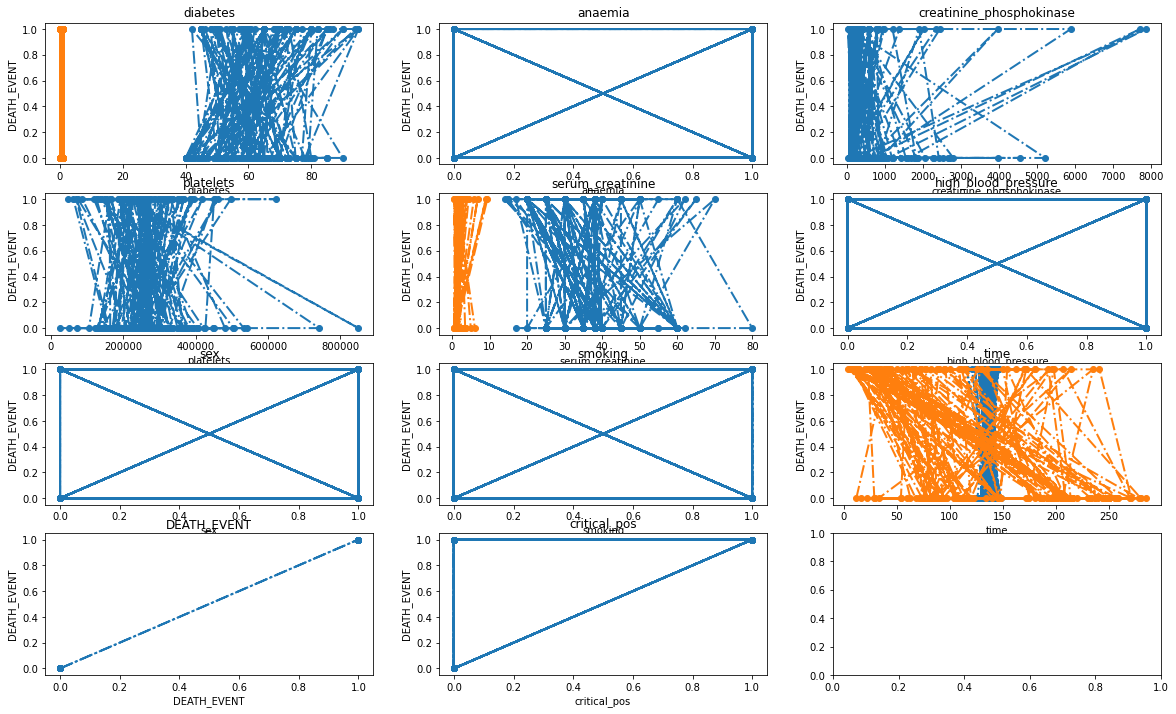

In [98]:
fig, axes = plt.subplots(figsize = (20,12), nrows = 4, ncols = 3)
for i, c in enumerate(df.columns):
    axes[int(i/4), int(i%3)].set_title(c)
    axes[int(i/4), int(i%3)].set_xlabel(c)
    axes[int(i/4), int(i%3)].set_ylabel('DEATH_EVENT')
    axes[int(i/4), int(i%3)].plot(df[c], df['DEATH_EVENT'], marker='o', lw=2, ls='-.') 


In [99]:
df.reset_index(drop=True, inplace=True)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,critical_pos
0,70.000,0,582,0,40,0,51000.00,2.7,136,1,1,250,0,0
1,50.000,1,298,0,35,0,362000.00,0.9,140,1,1,240,0,0
2,45.000,0,2442,1,30,0,334000.00,1.1,139,1,0,129,1,1
3,80.000,1,123,0,35,1,388000.00,9.4,133,1,1,10,1,1
4,42.000,0,102,1,40,0,237000.00,1.2,140,1,0,74,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,60.667,1,151,1,40,1,201000.00,1.0,136,0,0,172,0,0
295,58.000,0,582,1,35,0,122000.00,0.9,139,1,1,71,0,0
296,55.000,0,748,0,45,0,263000.00,1.3,137,1,0,88,0,0
297,44.000,0,582,1,30,1,263358.03,1.6,130,1,1,244,0,0


In [107]:
filt = (((df['smoking'] == 1) | (df['diabetes'] == 1 ) | (df['anaemia'] == 1) | (df['high_blood_pressure'] == 1)) & 
   (df['DEATH_EVENT'] == 1))
filt.sum()/df['DEATH_EVENT'].sum()

0.8645833333333334

In [104]:
def showFeatureImportance(model):
    #FEATURE IMPORTANCE
    # Get Feature Importance from the classifier
    feature_importance = model.feature_importances_

    # Normalize The Features
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    #plot relative feature importance
    plt.figure(figsize=(12, 12))
    plt.barh(pos, feature_importance[sorted_idx], align='center', color='#7A68A6')
    plt.yticks(pos, np.asanyarray(x_train.columns)[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Feature Importance')
    plt.show()

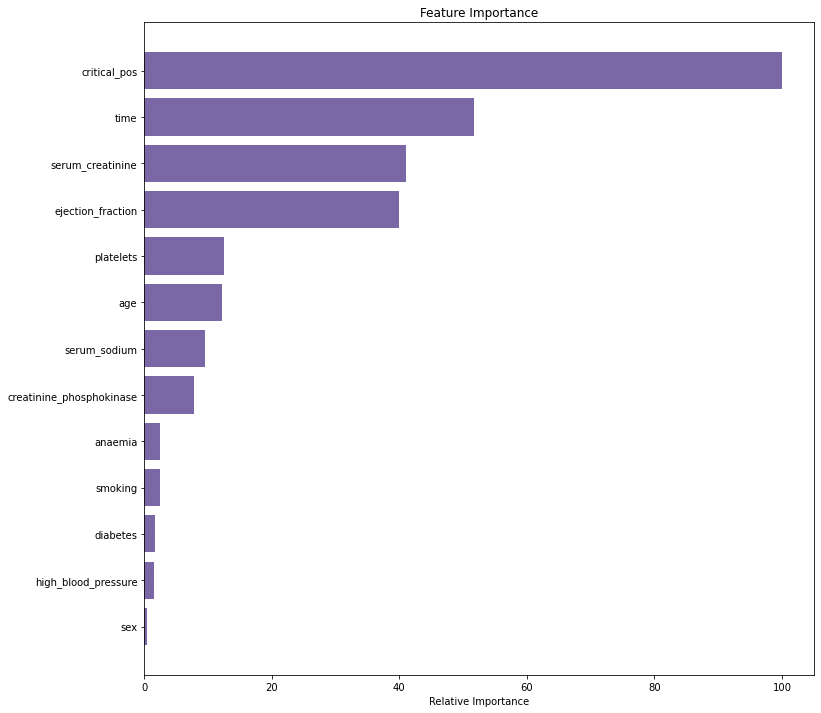

In [105]:
showFeatureImportance(model)

In [108]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,critical_pos
0,70.000,0,582,0,40,0,51000.00,2.7,136,1,1,250,0,False
1,50.000,1,298,0,35,0,362000.00,0.9,140,1,1,240,0,False
2,45.000,0,2442,1,30,0,334000.00,1.1,139,1,0,129,1,True
3,80.000,1,123,0,35,1,388000.00,9.4,133,1,1,10,1,True
4,42.000,0,102,1,40,0,237000.00,1.2,140,1,0,74,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,60.667,1,151,1,40,1,201000.00,1.0,136,0,0,172,0,False
295,58.000,0,582,1,35,0,122000.00,0.9,139,1,1,71,0,False
296,55.000,0,748,0,45,0,263000.00,1.3,137,1,0,88,0,False
297,44.000,0,582,1,30,1,263358.03,1.6,130,1,1,244,0,False
